# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 8

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 30 баллов


<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):

* Задача 3 &mdash; 30 баллов
* Задача 4 &mdash; 35 баллов

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):

* Задача 5 &mdash; 35 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):

* Задача 6 &mdash; 35 баллов



-----

In [ ]:
# Bot check

# HW_ID: phds_hw8
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.special import gamma, loggamma

sns.set_style("whitegrid")

%matplotlib inline

## <b>Теоретическая часть</b>
### <b><font color="blue">Легкая часть</font></b>

## Задача 1
Найдите оценку параметра $\theta$ методом максимального правдоподобия по выборке размера $n$ из распределения:

1. Для $\mathcal{N}(a,\sigma^2)$ найдите ОМП в следующих случаях:
    <br>a. $\theta = (a, \sigma^2)$
    <br>b. $\theta = \sigma^2$, $a$ известно
    <br>c. $\theta = a$, $\sigma^2$ известно (для этого случая посчитайте также асимптотическую дисперсию оценки по теореме из лекции)

**Решение:**

<br>a. Для начала пусть $\theta = (a, \sigma^2) = (\theta_1, \theta_2)$.

Тогда для нормального распределения функция правдоподобия будет выглядеть следующим образом:

$$L_x(\theta) = \prod \limits_{i = 1}^np_\theta(X_i) = \prod \limits_{i = 1}^n \frac{1}{\sqrt{2 \pi \theta_2}}e^{- \frac{(X_i - \theta_1)^2}{2 \theta_2}}$$

$$l_x(\theta) = ln(L_x(\theta)) = \sum \limits_{i = 1}^n ln(p_{\theta}(X_i)) = - \frac12 \left(n ln(2 \pi \theta_2) + \sum \limits_{i = 1}^{n} \frac{(X_i - \theta_1)^2}{\theta_2}\right)$$

\begin{cases}
  \frac{\partial{l_x(\theta)}}{\partial{\theta_1}} = \frac12 \sum \limits_{i = 1}^{n} \frac{2(X_i - \theta_1)}{\theta_2} = 0 \\
  \frac{\partial{l_x(\theta)}}{\partial{\theta_2}} = - \frac12 \left(\frac{n}{\theta_2} - \sum \limits_{i = 1}^{n} \frac{(X_i - \theta_1)^2}{\theta_2^2}\right) = 0
\end{cases}

\begin{cases}
  \sum \limits_{i = 1}^{n} X_i = n \theta_1 \\
  \sum \limits_{i = 1}^{n} \frac{(X_i - \theta_1)^2}{\theta_2^2} = \frac{n}{\theta_2}
\end{cases}

\begin{cases}
  \widehat{\theta}_{1, ОМП} = \frac1n \sum \limits_{i = 1}^{n} X_i = \overline{X} \\
  \widehat{\theta}_{2, ОМП} = \frac1n \sum \limits_{i = 1}^{n} (X_i - \theta_1)^2 = \frac{1}{n} \sum \limits_{i=1}^{n} (X_i - \overline{X})^2 = S^2
\end{cases}

$$\widehat{\theta}_{ОМП} = (\overline{X}, S^2)$$

<br>b. Для начала пусть $\theta = (a, \sigma^2) = (a, \theta)$.

Тогда для нормального распределения c известным параметром $a$ функция правдоподобия будет выглядеть следующим образом:

$$L_x(\theta) = \prod \limits_{i = 1}^np_\theta(X_i) = \prod \limits_{i = 1}^n \frac{1}{\sqrt{2 \pi \theta}}e^{- \frac{(X_i - a)^2}{2 \theta}}$$

$$l_x(\theta) = ln(L_x(\theta)) = \sum \limits_{i = 1}^n ln(p_{\theta}(X_i)) = - \frac12 \left(n ln(2 \pi \theta) + \sum \limits_{i = 1}^{n} \frac{(X_i - a)^2}{\theta}\right)$$
     
$$\frac{\partial{l_x(\theta)}}{\partial{\theta}} = - \frac12 \left(\frac{n}{\theta} - \sum \limits_{i = 1}^{n} \frac{(X_i - a)^2}{\theta^2}\right) = 0$$

$$\widehat{\theta}_{ОМП} = \frac1n \sum \limits_{i = 1}^{n} (X_i - a)^2$$

<br>b. Для начала пусть $\theta = (a, \sigma^2) = (\theta, \sigma^2)$.

Тогда для нормального распределения c известным параметром $\sigma^2$ функция правдоподобия будет выглядеть следующим образом:

$$L_x(\theta) = \prod \limits_{i = 1}^np_\theta(X_i) = \prod \limits_{i = 1}^n \frac{1}{\sqrt{2 \pi \sigma^2}}e^{- \frac{(X_i - \theta)^2}{2 \sigma^2}}$$

$$l_x(\theta) = ln(L_x(\theta)) = \sum \limits_{i = 1}^n ln(p_{\theta}(X_i)) = - \frac12 \left(n ln(2 \pi \sigma^2) + \sum \limits_{i = 1}^{n} \frac{(X_i - \theta)^2}{\sigma^2}\right)$$
     
$$\frac{\partial{l_x(\theta)}}{\partial{\theta_1}} = \frac12 \sum \limits_{i = 1}^{n} \frac{2(X_i - \theta)}{\sigma^2} = 0$$

$$\widehat{\theta}_{ОМП} = \frac1n \sum \limits_{i = 1}^{n} X_i = \overline{X}$$

**Th:** Пусть

1.   Носитель плотности $({x: p_\theta(x) > 0})$ не зависит от $\theta$
2.   $\Theta$ - открытое множестов в $\mathbb{R}^d$
3.   Плотность $p_\theta(x)$ - достаточно гладкая
4.   Уравнение $\frac{\partial{l_x(\theta)}}{\partial{\theta}} = 0$ имеет ровно один корень.

Тогда: $\widehat{\theta}_{ОМП}$ - состоятельная АНО $\theta$ ассимптотической матрицей ковариаций:

$$\sum_{i = 1}^n (\theta) = i^{-1}(\theta), \; где \; (i(\theta))_{jk} = \mathbb{E}_{\theta}\left(\frac{\partial{l_x(\theta)}}{\partial{\theta_j}}\frac{\partial{l_x(\theta)}}{\partial{\theta_k}}\right)$$

Т.к. все условия теоремы выполнены, то асимптотическая диспресия оценки меет вид:

$$i(\theta) = \mathbb{E}_{\theta} \left(\frac{X_1 - \theta}{\sigma^2}\right)^2 = \frac{1}{\sigma^4} \mathbb{E}_{\theta} (X_1 - \mathbb{E}_{\theta}(X_1))^2 = \frac{\sigma^2}{\sigma^4} = \frac{1}{\sigma^2} \Rightarrow i^{-1} = \sigma^2$$

2. $\mathrm{Pois}(\theta)$. Посчитайте асимптотическую дисперсию, если оценка является асимптотически нормальной по теореме из лекции.

**Решение:**

Для распределения Пуассона c неизвестным параметром $\theta$ функция правдоподобия будет выглядеть следующим образом:

$$L_x(\theta) = \prod \limits_{i = 1}^np_\theta(X_i) = \prod \limits_{i = 1}^n \frac{\theta^{X_i}e^{-\theta}}{X_i!}$$

$$l_x(\theta) = ln(L_x(\theta)) = \sum \limits_{i = 1}^n ln(p_{\theta}(X_i)) = -n\theta + ln(\theta)\sum \limits_{i = 1}^nX_i - \sum \limits_{i = 1}^nln(X_i!)$$
     
$$\frac{\partial{l_x(\theta)}}{\partial{\theta}} = -n + \frac{1}{\theta} \sum \limits_{i = 1}^n X_i = 0$$

$$\widehat{\theta}_{ОМП} = \frac1n \sum \limits_{i = 1}^{n} X_i = \overline{X}$$

Т.к. все условия теоремы выполнены, то асимптотическая диспресия оценки меет вид:

$$i(\theta) = \mathbb{E}_{\theta} \left(-1 + \frac{X_1}{\theta}\right)^2 = \mathbb{E}_{\theta} \left(1 - 2\frac{X_1}{\theta} + \frac{X_1^2}{\theta^2}\right) = 1 - 2 + \frac{1}{\theta^2}(\mathbb{D}_\theta(X_1) + \mathbb{E}_{\theta}(X_1)^2) = \\ = -1 + \frac{\theta + \theta^2}{\theta^2} = \frac{1}{\theta} \Rightarrow i^{-1} = \theta$$
        

## Задача 2
Рассмотрим задачу классификации в случае наличия более двух классов.

Пусть $X_1,...,X_n$ &mdash;  выборка из категориального распределения, то есть $P_\theta(X_1 = j) = \theta_j$ для $j \in \{1, ..., k\}$, причем $\theta = (\theta_1, ..., \theta_k), \theta_j \geqslant 0$ и $\theta_1 + ... + \theta_k = 1$.

1. Получите функцию правдоподобия для данной задачи. Используя результат, выпишите функцию потерь, которую вы бы минимизировали при обучении модели классификации. Проверьте, что в случае $k=2$ результат совпадает с logloss'ом.
2. Найдите оценку максимального правдоподобия параметра $\theta$ и проверьте ее на состоятельность.

**Решение:**

1. $$L_x(\theta) = \prod \limits_{j = 1}^k \theta_j ^{m_j}, \quad \sum \limits_{j = 1}^k m_j = n,$$ где $m_j$ - количество элементов выборки, равных j, $\theta$ - вектор вероятностей для каждой из $k$ категорий, где $\theta_j$ - вероятность принадлежности категории $j$. Тогда логарифм функции правдоподобия имеет вид:

$$l_x(\theta) = \sum \limits_{j=1}^k m_j ln \theta_j$$

Тогда, если у нас есть только два класса $(k = 2)$, то $m_1$ и $m_2$ будут представлять количество элементов в выборке, принадлежащих классам 1 и 2 соответственно.

$$l_x(\theta) = m_1 ln \theta_1 + m_2 ln \theta_2 = m_1 ln \theta_1 + (n - m_1)ln(1 - \theta_1) = \sum \limits_{i = 1}^n\left[x_iln(\theta) + (1 - x_i)ln(1 - \theta)\right] = -LogLoss,$$

где $x_i$ - это бинарная переменная, равная 1, если $i-ый$ элемент принадлежит классу 1, и 0 в противном случае. Именно при такой замене мы можем перейти к суммированию и т.о. получить выражение для $-LogLoss$.

2. Найдем экстремум логарифма функции правоподобия при условии $\sum \limits_{i = 1}^k \theta_i = 1$:

Лагранжиан: $F(\theta, \lambda) = \sum \limits_{i=1}^k m_i ln \theta_i + \lambda (1 - \sum \limits_{i=1}^k \theta_i)$.

\begin{cases}
    \frac{\partial{F(\theta, \lambda)}}{\partial{\lambda}} = 1 - \sum \limits_{i=1}^k \theta_i = 0
    \\
    \frac{\partial{F(\theta, \lambda)}}{\partial{\theta_i}} = \frac{m_i}{\theta_i} - \lambda = 0
\end{cases}

\begin{cases}
    \theta_i = \frac{m_i}{\lambda}
    \\
    \sum \limits_{i=1}^k \theta_i = \sum \limits_{i=1}^k \frac{m_i}{\lambda} = \frac{n}{\lambda}
\end{cases}

$$\theta_i = \frac{m_i}{n} \Rightarrow \widehat{\theta}_{ОМП} = (\frac{m_1}{n}, \frac{m_2}{n}, ..., \frac{m_k}{n})$$

Т.к. выполненны условия регулярности, то по теореме выше можно утвержать, что данная $\widehat{\theta}_{ОМП}$ состоятельна.





### <b><font color="orange">Сложная часть</font></b>

## Задача 3

Рассмотрим модель линейной регрессии

$$Y = X \theta + ɛ,$$

где $Y \in \mathbb{R}^n$ - отклик, $X \in \mathbb{R}^{n \times d}$, $\theta \in \mathbb{R}^d$, $ɛ \in \mathbb{R}^n$ - шум, $n > d$, $rk X = d$.

Будем рассматривать нормальный и гомоскедастичный шум, т.е. $ɛ \sim \mathcal{N}(0, 1)$

1. Получите выражение для функции правдоподобия в данной модели. Минимизации какой функции потерь эквивалента максимизация правдоподобия в данной задаче?
2. Найдите оценку максимального правдоподобия для $(\theta, \sigma^2)$.

3. Пусть $x_{new} \in \mathbb{R}^{d}$ - новый объект. Постройте асимптотический доверительный интервал для ожидаемого значения отклика на этом объекте $y_{new} = x_{new}^T \theta$.

  <br>*Указание:* используя модель регрессии, получите распределение, которое имеет величина $\widehat{\theta}_{МНК}$. Учитывая свойства, данные в домашнем задании №1, получите распределение для  $x_{new}^T\widehat{\theta}_{\text{МНК}}$. Считая величину $\sigma^2$ известной, запишите интервал. Далее замените дисперсию $\sigma^2$ на ее состоятельную оценку.

  **Решение:**

  1. Так как должны выполняться условия ЦПТ, то функция правдоподобия для модели линейной регрессии будет иметь следующий вид:

$$L = \prod \limits_{i = 1}^np_\theta = \prod \limits_{i = 1}^n \frac{1}{\sqrt{2 \pi \sigma^2}}e^{-\frac{(y_i - x_i^T\theta)^2}{2\sigma^2}}$$

$$l = ln(L) = \sum \limits_{i = 1}^n ln(p_{\theta}) = -\sum \limits_{i = 1}^n\left(\frac{(y_i - x_i^T\theta)^2}{2\sigma^2} + ln\frac{1}{\sqrt{2 \pi \sigma^2}}\right) = -\frac{1}{2 \sigma^2} \sum \limits_{i = 1}^n(y_i - x_i^T\theta)^2 - \frac{n}{2} ln(2 \pi) - \frac{n}{2}ln(\sigma^2) = \\ = -\frac{1}{2 \sigma^2} (Y - X\theta)^T(Y - X\theta) - \frac{n}{2} ln(2 \pi) - \frac{n}{2}ln(\sigma^2)$$

Минимизации MSE эквивалента максимизации правдоподобия в данной задаче.

  2. Найдем ОМП:

\begin{cases}
    \frac{\partial{l}}{\partial{\theta}} = -\frac{1}{2\sigma^2} \frac{\partial{}}{\partial{\theta}}\left[(Y - X\theta)^T(Y - X\theta)\right] = 0
    \\
    \frac{\partial{l}}{\partial{\sigma^2}} = -\frac{n}{2\sigma^2} + \frac{1}{2\sigma^4}(Y - X\theta)^T(Y - X\theta) = 0
\end{cases}

\begin{cases}
    \frac{\partial{l}}{\partial{\theta}} = -\frac{1}{\sigma^2}\left[X^TX\theta - X^TY\right] = 0
    \\
    \sigma^2 = \frac{1}{n}(Y - X\theta)^T(Y - X\theta)
\end{cases}

Так как шум $\varepsilon = Y - X\theta:$

\begin{cases}
    \widehat{\theta} = (X^TX)^{-1}X^TY
    \\
    \sigma^2 = \frac{1}{n}\sum \limits_{i = 1}^n \varepsilon_i^2
\end{cases}

3. Так как $x_{new} \in \mathbb{R}^{d}$ - новый объект, а $y_{new} = x_{new}^T \theta$, то АДИ будет иметь вид:

$$y_{new} \in \left((X^TX)^{-1}X^TY \pm \frac{Z_{\frac{1 + \alpha}{2}}}{\sqrt{n}} \cdot \frac{1}{n}\sum \limits_{i = 1}^n \varepsilon_i^2\right)$$



## <b>Практическая часть</b>
### <b><font color="blue">Легкая часть</font></b>
## Задача 4
Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine">`wine dataset`</a> и рассмотрите столбцы `Alcalinity of ash`, `Nonflavanoid phenols`, `Proanthocyanins` и `Hue` для вина *первого типа*. Тип вина указан в первом столбце. Для работы с табличными данными используйте библиотеку `pandas`.

Постройте доверительные интервалы для параметров сдвига каждого из столбцов, предполагая, что столбцы имеют нормальное распределение.
Требуется построить:
 * асимтотические доверительные интервалы при помощи центральной предельной теоремы;
 * точные неасимптотические при помощи распределений хи-квадрат, Стьюдента.


 Запишите их в виде таблицы.

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

df = fetch_ucirepo(id = 109)

df['data']['features'].head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
wine_df = pd.DataFrame(df['data']['features'], columns = df['data']['features'].columns)
wine_df['target'] = df['data']['targets']

type_1_wine = wine_df[wine_df['target'] == 1]
selected_columns = ['Alcalinity_of_ash', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Hue']
final_df = type_1_wine[selected_columns]

final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 58
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcalinity_of_ash     59 non-null     float64
 1   Nonflavanoid_phenols  59 non-null     float64
 2   Proanthocyanins       59 non-null     float64
 3   Hue                   59 non-null     float64
dtypes: float64(4)
memory usage: 2.3 KB


In [ ]:
a = 0.95
n = len(final_df['Hue'])

z = sps.norm().ppf((1 + a) / 2)
T = sps.t(df = n - 1).ppf((1 + a)/2)

means = []
arrs = []
t_arrs = []

for i in final_df.columns:
    mean = final_df[i].mean()
    std = final_df[i].std()

    arr = [round(mean - std * z / np.sqrt(n), 2), round(mean + std * z / np.sqrt(n), 2)]
    t_arr = [round(mean - std * T / np.sqrt(n - 1), 2), round(mean + std * T / np.sqrt(n - 1), 2)]

    arrs.append(arr)
    t_arrs.append(t_arr)

results = pd.DataFrame({
    'names' : selected_columns,
    'асимптотич.' : arrs,
    'точный': t_arrs
})

results

,names,асимптотич.,точный
0,Alcalinity_of_ash,"[16.39, 17.69]","[16.37, 17.71]"
1,Nonflavanoid_phenols,"[0.27, 0.31]","[0.27, 0.31]"
2,Proanthocyanins,"[1.79, 2.0]","[1.79, 2.01]"
3,Hue,"[1.03, 1.09]","[1.03, 1.09]"


Сделайте выводы по полученной таблице.

**Вывод:**

В данном случае мы не замечаем существенных различий между асимптотическим и точным интервалами. Это означает, что количества измерений достаточно для того, чтобы начала действовать ЦПТ, и точный интервал совпал с асимптотическим.

## Задача 5
### Функция правдоподобия
Дана параметрическая модель и 3 выборки, состоящие из 2-3 наблюдений. Для удобства, выборки представлены в виде python-кода — каждая выборка записана как список ее элементов; множество выборок представлено как список списков, соответствующих выборкам из множества. Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: `[[-1, 1], [-5, 5], [-1, 5]]`

*b).* Параметрическая модель $Exp(\theta)$, выборки: `[[1, 2], [0.1, 1], [1, 10]]`

*c).* Параметрическая модель $U[0, \theta]$, выборки: `[[0.2, 0.8], [0.5, 1], [0.5, 1.3]]`

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: `[[0, 1], [5, 5], [0, 5]]`

*e).* Параметрическая модель $Pois(\theta)$, выборки: `[[0, 1], [0, 10], [5, 10]]`

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ — параметр сдвига, выборки: `[[-0.5, 0.5], [-2, 2], [-4, 0, 4]]`

Выполнить задание, не создавая много кода, поможет следующая функция.

Допишите ее.

In [ ]:
def draw_likelihood(density_function, grid, samples, label):
    """Изображает график функции правдоподобия для каждой из 3 выборок.

    Аргументы:
    density_function --- функция, считающая плотность (обычную или дискретную).
        На вход данная функция должна принимать массив размера (1, len_sample)
        и возвращать массив размера (len_grid, len_sample).
    grid --- массив размера (len_grid, 1) --- сетка для построения графика;
    samples --- три выборки;
    label --- latex-код параметрической модели.
    """
    assert len(samples) == 3, "Число выборок не равно 3."

    plt.figure(figsize=(18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample)[np.newaxis, :]
        likelihood = np.prod(density_function(sample), axis = 1)

        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода:

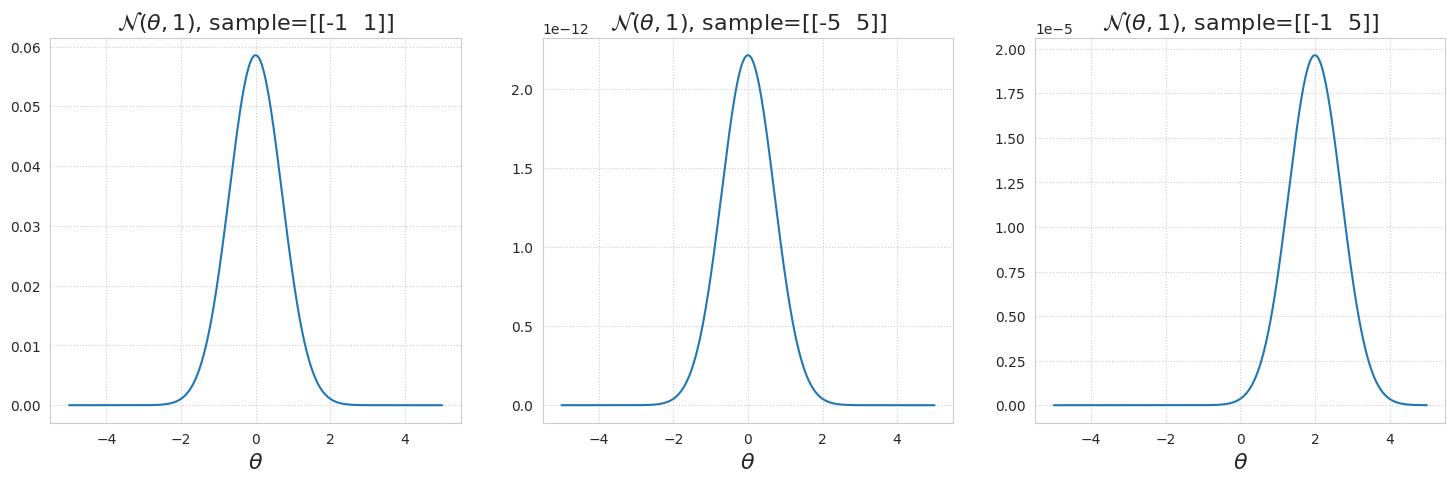

In [ ]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid,
                [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')

Выполните остальные:

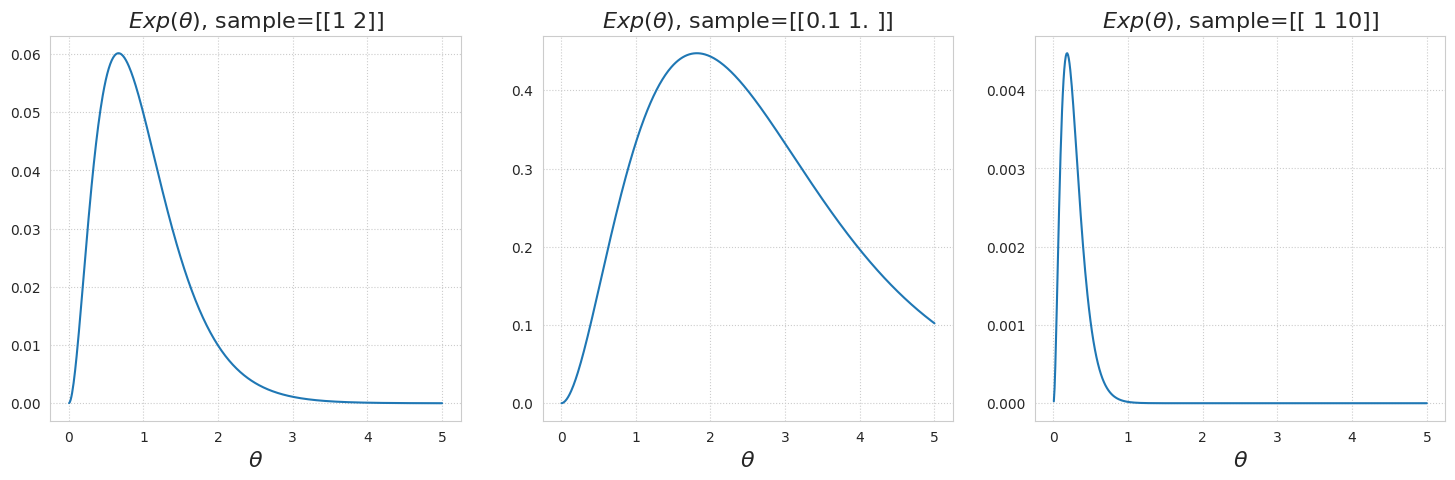

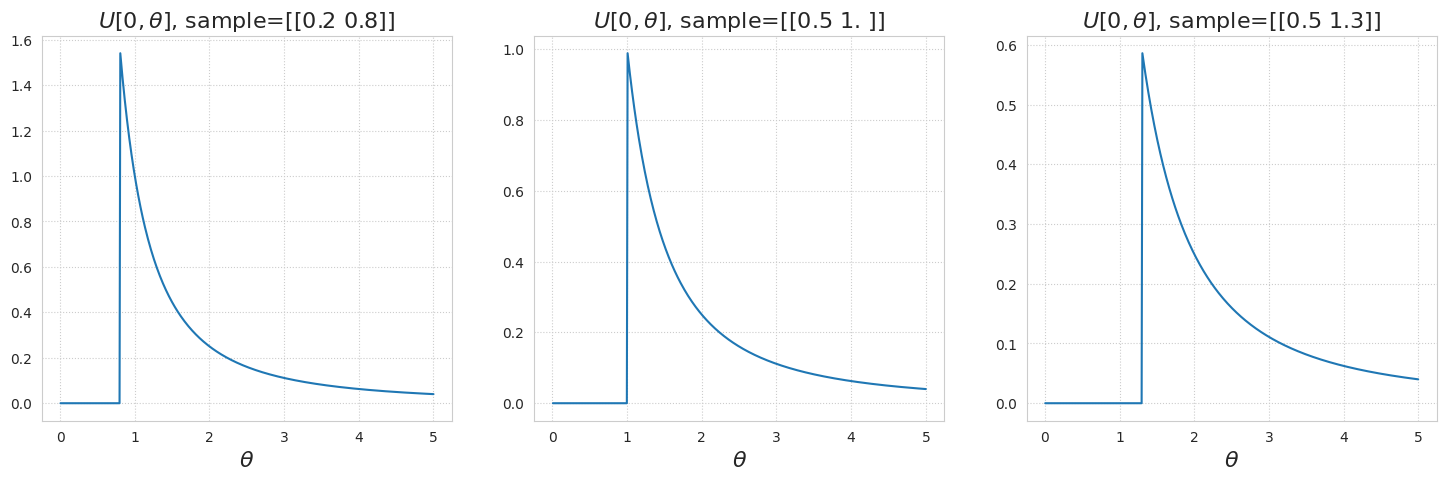

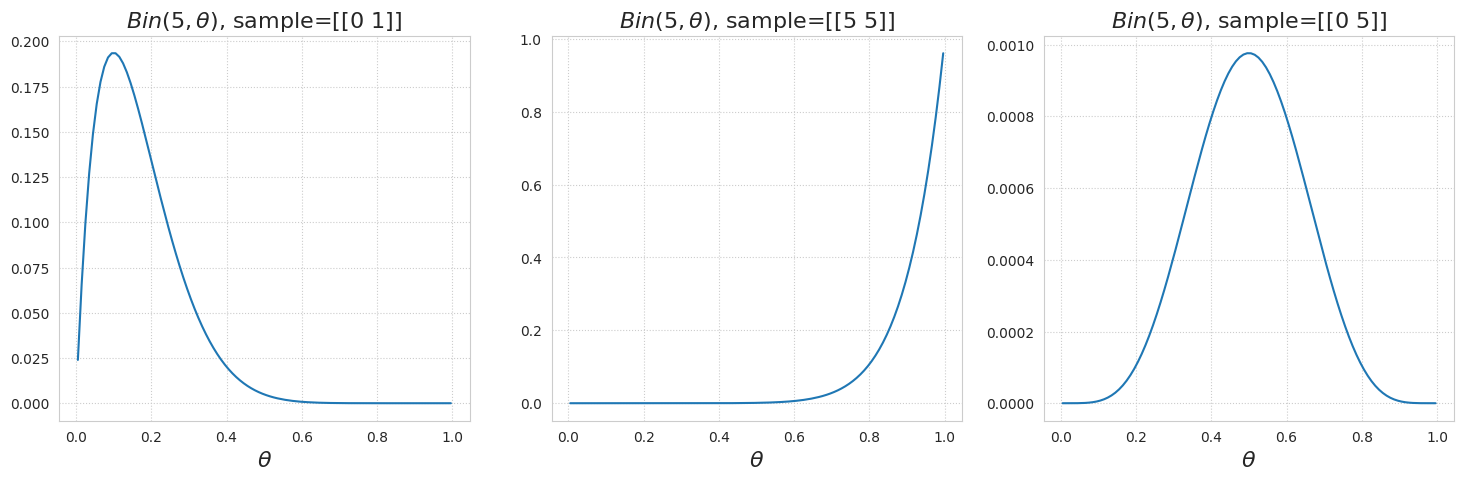

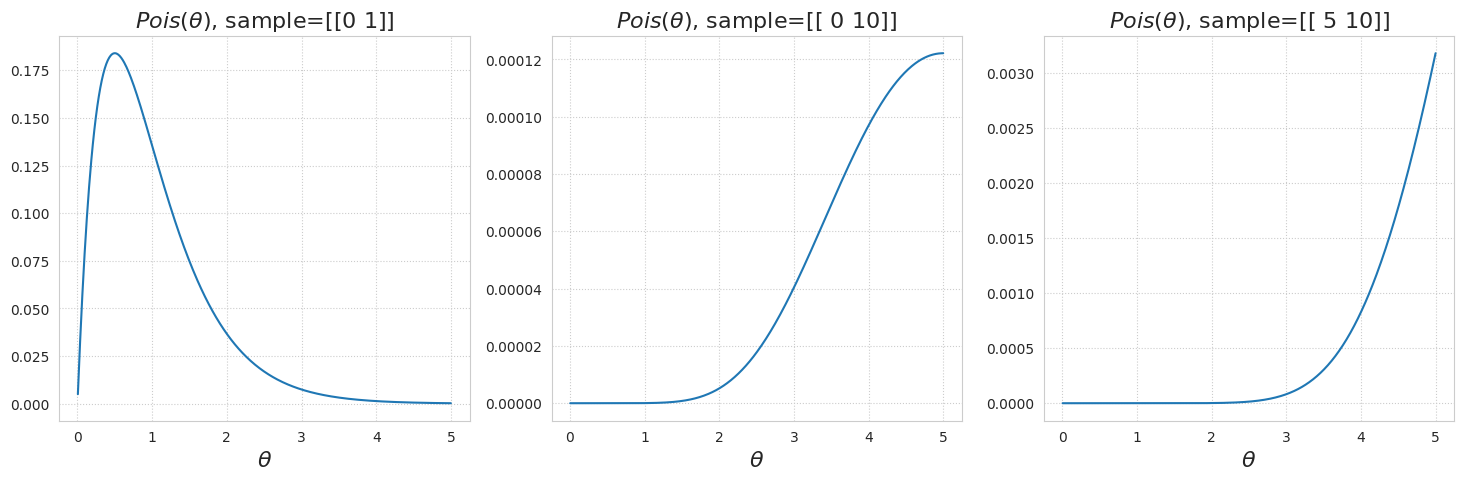

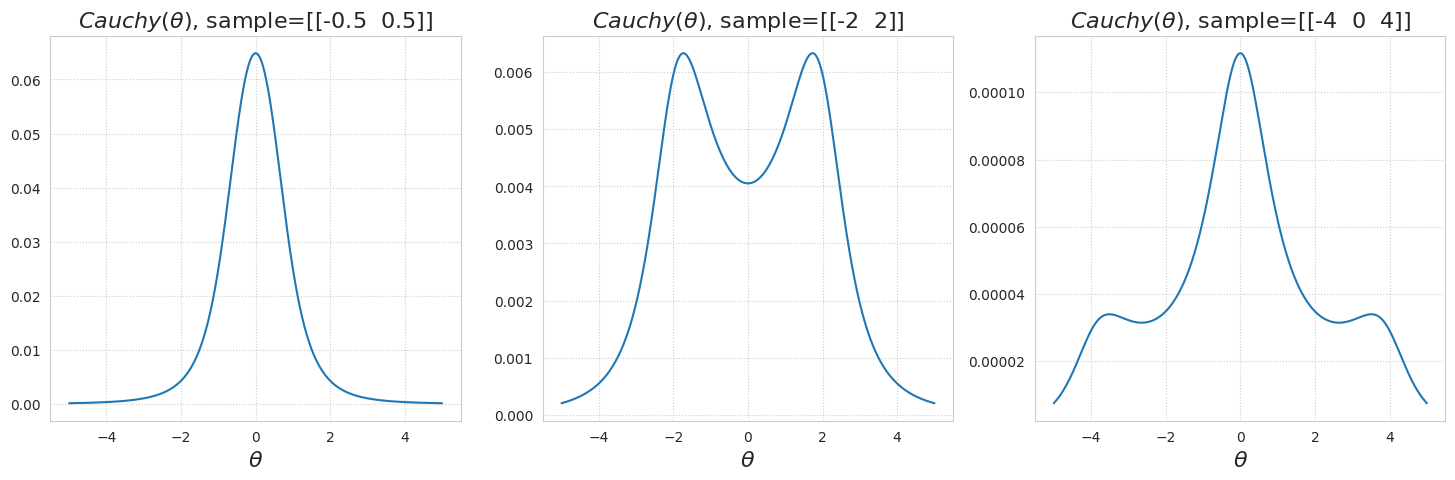

In [ ]:
densities = [
    sps.expon(scale = 1/grid).pdf,
    sps.uniform(0, grid).pdf,
    sps.binom(5, grid).pmf,
    sps.poisson(mu = grid).pmf,
    sps.cauchy(loc=grid).pdf
]

values = [
    [[1, 2], [0.1, 1], [1, 10]],
    [[0.2, 0.8], [0.5, 1], [0.5, 1.3]],
    [[0, 1], [5, 5], [0, 5]],
    [[0, 1], [0, 10], [5, 10]],
    [[-0.5, 0.5], [-2, 2], [-4, 0, 4]]
]

names = [
    '$Exp(\\theta)$',
    '$U[0, \\theta]$',
    '$Bin(5, \\theta)$',
    '$Pois(\\theta)$',
    '$Сauchy(\\theta)$'
]

for i in range(5):
    draw_likelihood(densities[i], grid, values[i], names[i])

Прокомментируйте полученные графики. Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

*Примечание:* В выводе для каждой модели требуется описать, как меняются значения функции (сдвиг, масштаб, форма) при изменении выборки, где достигается максимум, а также какие значения параметра более правдоподобны для данной выборки, какие — менее.

**Вывод:**

1. Для нормального распределения изменение выборки может привести к смещению, масштабированию и изменению формы графика. Если значения близки друг к другу, то максимум функции вероятности достигается при более высокой интенсивности. Для выборки, где значения распределены симметрично относительно среднего, параметры модели более правдоподобны, чем в случае несимметричной выборки.

2. Для экспоненты изменение выборки влияет на ширину и высоту кривой. Максимум функции вероятности достигается там, где данные наиболее плотны. Значения параметра, отражающие наблюдаемую выборку с более узким распределением, более правдоподобны.

3. В общем, наблюдается тенденция к изменению сдвига, масштаба и формы графика при изменении выборки. Максимум функции вероятности обычно совпадает с пиком данных. Значения параметра, которые наилучшим образом отражают выборку, считаются более правдоподобными.

4. Для распределения Коши наблюдается формирование "мультиплетов", когда значения близки, но не сливаются. Максимум функции вероятности обычно соответствует плотной области данных. В зависимости от конкретной выборки значения параметров могут быть либо более, либо менее правдоподобными.

5. Функция правдоподобия представляет собой плотность выборки, в которую в качестве параметра подставляется собственная выборка.

Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже:

In [ ]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчета оценки максимального правдоподобия? Реализуйте это.

*Подсказка:* нужно использовать некоторый [метод класса](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html), реализующий это распределение.

**Ответ на вопрос и описание метода решения проблемы:**

При увеличении размера выборки на $n$ единиц, дисперсия выборки уменьшится в $\sqrt{n}$ раз. Поэтому при генерации выборки и вычислении ее правдоподобия необходимо учесть масштаб, задав $scale = 1/\sqrt{n}$.

In [ ]:
sample = sps.norm(scale = 1/np.sqrt(10**5)).rvs(size = 10**5)
likelihood = sps.norm(scale = 1/np.sqrt(10**5)).pdf(sample).prod()
print(likelihood)

inf


### <b><font color="orange">Сложная часть</font></b>


## Задача 6
Асимпотические доверительные интервалы ничего не могут гарантировать на малых размерах выборки.
В этой задаче вам предстоит иллюстрировать этот факт, посчитав реальный уровень доверия для интервалов.

**Реальный уровень доверия (оценка доли покрытия интервалом)**  - доля случаев попадания истинного значения параметра в доверительный интервал.

*Пример подсчета:*

Допустим, вы хотите оценить реальный уровень доверия интервала для $a$, если $X \sim \mathcal{N}(a, \sigma^2)$

- Фиксируете истинные $(a, \sigma^2)$, для которых будете делать оценку
- Генерируете $B$ выборок из $\mathcal{N}(a, \sigma^2)$ с зафиксированными параметрами
- По каждой выборке получаете АДИ для $a$
- Считаете долю случаев, когда истинное $a$ попадает в интервал

Эта доля и будет оценкой доли покрытия интервала.

**Важно:** вы симулируете реальную ситуацию, когда вы не знаете ни $a$, ни $\sigma$, поэтому в формулах для АДИ их **использовать нельзя**!

**Важно:** при такой оценке реального уровня доверия вы используете метод Монте-Карло. Погрешность этого метода составляет $\sim \frac{1}{\sqrt{n}}$, где $n$ - количество выборок, по которым осуществляется оценка.

*Вопрос:* какое $n$ нужно брать, если вы хотите оценить реальный уровень доверия с точностью до 2 знаков ($\delta = 0.01$)?

**Ваш ответ:** $n \geq 10 000$


### Генерация выборок для оценки

Сгенерируйте набор выборок из нормального распределения $\mathcal{N}(\theta, 1)$ при $\theta=0$

In [ ]:
theta = 0  # истинное значение параметра
sample_size = 300
sample_count = 10000
X = sps.norm.rvs(loc = theta, scale = 1, size = (sample_count, sample_size))

### Случай АДИ

На лекции вы получали формулу для асимптотического доверительного интервала для $a$

Асимптотический доверительный интервал: $\theta \in \bigg(\overline{X} - \frac{S}{\sqrt{n}}z_{(1+\alpha)/2}, \overline{X} + \frac{S}{\sqrt{n}}z_{(1+\alpha)/2} \bigg)$

Посчитайте $z$ (используйте функцию `.ppf`)

In [ ]:
alpha = 0.95
z = sps.norm.ppf((1 + alpha) / 2)
print(z)

1.959963984540054


Постройте график зависимости реального уровня доверия интервала от размера выборки. График начинайте с $n=2$.

Для этого вам нужно провести описанную выше процедуру для подвыборок разных размеров. Для подсчета интервалов по префиксам используйте функцию `np.cumsum`. Для того чтобы не запутаться, разносите подсчет разных величин, входящих в формулу, по разным строчкам.

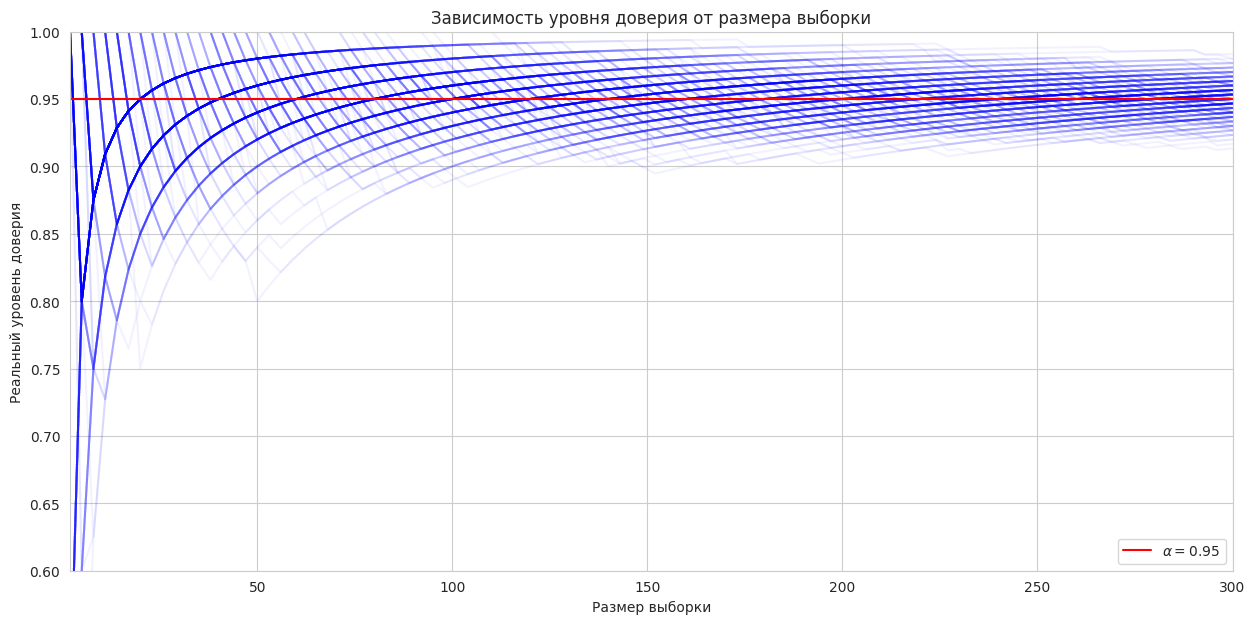

In [ ]:
def adi(X, z, sigma = 1, theta = 0):
    """
    Функция для оценки реального уровня доверия.
    Параметры:
        X : Массив выборок размера (sample_count, sample_size).
        z : Значение z для построения доверительного интервала.
        sigma : Стандартное отклонение распределения.
        theta : Истинное значение параметра.
    """
    mean = np.mean(X, axis = 1)

    n = X.shape[1]
    mn = mean - z * sigma / np.sqrt(n)
    mx = mean + z * sigma / np.sqrt(n)

    res = np.array([1 if mn[i] < theta < mx[i] else 0 for i in range(len(X))])

    return res.sum() / len(res)

plt.figure(figsize = (15, 7))

n_grid = np.linspace(2, sample_size, 100).astype('int64')

for i in range(400):
    X = sps.norm.rvs(loc = theta, scale = 1, size = (sample_count, sample_size))
    results = [adi(X[:][:n], z) for n in n_grid]
    plt.plot(n_grid, results, color='b', alpha = 0.05)

plt.plot((2, sample_size), (alpha, alpha), color = 'r', label = fr'$\alpha = {alpha}$')
plt.xlim(2, sample_size)
plt.ylim(0.6, 1)

plt.title('Зависимость уровня доверия от размера выборки')
plt.xlabel('Размер выборки')
plt.ylabel('Реальный уровень доверия')

plt.grid(True)
plt.legend()
plt.show()

**Сделайте выводы:**

При небольших значениях размера выборки реальный уровень доверия может значительно отличаться от ожидаемого, как в сторону завышения, так и в сторону занижения. Однако, при увеличении размера выборки примерно до 300, большинство траекторий сходятся к постоянному значению. Для большинства случаев реальный уровень доверия остается в пределах примерно ±0.3 от ожидаемого значения.

### Случай ТДИ

На лекции вы получали формулу для точного доверительного интервала для $a$ в нормальной модели

Точный доверительный интервал: $\theta \in \bigg(\overline{X} - \frac{S}{\sqrt{n-1}}T_{n-1,(1+\alpha)/2}, \overline{X} + \frac{S}{\sqrt{n-1}}T_{n-1,(1+\alpha)/2} \bigg)$

**Вопрос:** чем этот интервал лучше предыдущего?

**Ваш ответ:**

Данный интервал обеспечивает точные вероятностные границы для параметра оценки при заданном уровне доверия.

Постройте график реального уровня доверия интервала от размера выборки для этого вида интервала. График начинайте с $n=2$. Сравните его с предыдущим.

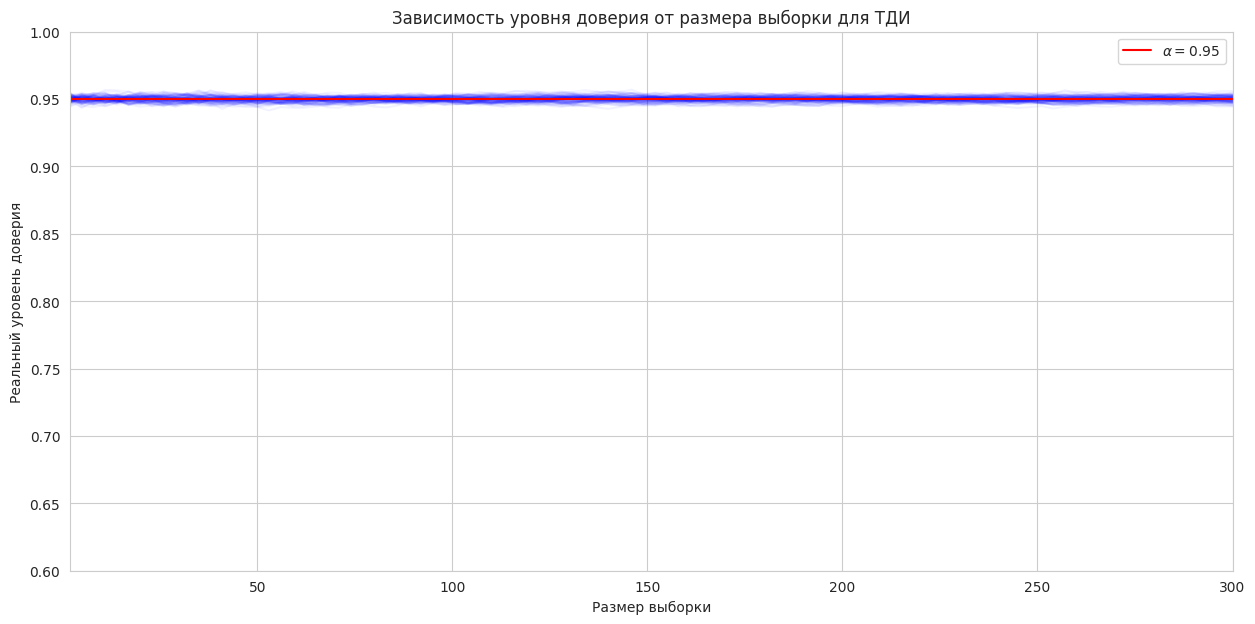

In [ ]:
def tdi(X, alpha = 0.95, theta = 0):
    """
    Функция для оценки реального уровня доверия точного доверительного интервала.
    Параметры:
        X : Массив выборок размера (sample_count, sample_size).
        alpha : Уровень доверия.
        theta : Истинное значение параметра.
    """
    n = X.shape[1]
    mean = np.mean(X, axis=1)
    std = np.std(X, axis=1, ddof=1)

    t = sps.t.ppf((1 + alpha) / 2, df=n - 1)

    mn = mean - t * std / np.sqrt(n)
    mx = mean + t * std / np.sqrt(n)

    res = np.array([1 if mn[i] < theta < mx[i] else 0 for i in range(len(X))])

    return res.sum() / len(res)

plt.figure(figsize=(15, 7))

n_grid = np.linspace(2, sample_size, 100).astype('int64')

for i in range(100): #уменьшил с 400 до 100, а то долго
    X = sps.norm.rvs(loc=theta, scale=1, size=(sample_count, sample_size))
    results = [tdi(X[:, :n]) for n in n_grid]
    plt.plot(n_grid, results, color='b', alpha=0.05)

plt.plot((2, sample_size), (alpha, alpha), color='r', label=fr'$\alpha = {alpha}$')
plt.xlim(2, sample_size)
plt.ylim(0.6, 1)

plt.title('Зависимость уровня доверия от размера выборки для ТДИ')
plt.xlabel('Размер выборки')
plt.ylabel('Реальный уровень доверия')

plt.grid(True)
plt.legend()
plt.show()

**Вывод:**

Так как график реального уровня доверия интервала для ТДИ сходится к константе, то это может свидетельствовать о том, что метод точных доверительных интервалов обеспечивает стабильные и надежные оценки параметров при различных размерах выборки.